In [ ]:
Team Members: Sashi Gandavarapu & Raghu Pamidimarri

In [81]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
from sklearn.ensemble import RandomForestClassifier
import matplotlib as plt
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [82]:
#Read data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sampleSubmission = pd.read_csv("sampleSubmission.csv")

target = 'Cover_Type'

#shuffle train data
train = train.sample(frac=1.0)

In [83]:
#Examine trian data
print train[1:3]
print 'length of train data: ', len(train)
print 'length of test data: ', len(test)
print 'frequency of target variable \n' , train.Cover_Type.value_counts()

        Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
8305  8306       3327      18      9                               631   
40      41       2699     347      3                                 0   

      Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
8305                              93                              793   
40                                 0                             2096   

      Hillshade_9am  Hillshade_Noon  Hillshade_3pm     ...      Soil_Type32  \
8305            213             221            144     ...                1   
40              213             234            159     ...                0   

      Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
8305            0            0            0            0            0   
40              0            0            0            0            0   

      Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
8305            0            0           

In [84]:
IDcol = 'Id'
predictors = [x for x in train.columns if x not in [target, IDcol]]
scaler = StandardScaler()

#standard scaler
train[predictors] = scaler.fit_transform(train[predictors])
test[predictors] = scaler.transform(test[predictors])

In [88]:
def modelfit(alg, X, Y, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(X,Y)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X)
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, X, Y, cv=cv_folds, scoring='f1_weighted')
    
    #Print model report:
    print "\nModel Report"
    print "Accuracy (Train): %.4g" % metrics.accuracy_score(Y.values, dtrain_predictions)
    #print metrics.classification_report(Y.values, dtrain_predictions)
    
    if performCV:
        print "CV (f1) Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g \n" % \
        (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, list(X_fit.columns.values)).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')

In [86]:
#Split into training and development dataset
X_fit, X_eval, y_fit, y_eval= train_test_split(train[predictors], train[target], test_size=0.3,random_state=10)

In [89]:
#1. Try knn
knn = KNeighborsClassifier()
print "-------knn-------------"
modelfit(knn, X_fit, y_fit,printFeatureImportance=False)
preds = knn.predict(X_eval)
print "Accuracy (Dev) : %.4g" % metrics.accuracy_score(y_eval.values, preds)
#print metrics.classification_report(y_eval.values, preds)

#2. Try NB
bnb = BernoulliNB(binarize=0.5)
print "-------NB-------------"
modelfit(bnb, X_fit, y_fit,printFeatureImportance=False)
preds = bnb.predict(X_eval)
print "Accuracy (Dev) : %.4g" % metrics.accuracy_score(y_eval.values, preds)
#print metrics.classification_report(y_eval.values, preds)

#3. Logistic regression
lgr = LogisticRegression()
print "-------Logistic Regression-------------"
modelfit(lgr, X_fit, y_fit,printFeatureImportance=False)
preds = lgr.predict(X_eval)
print "Accuracy (Dev) : %.4g" % metrics.accuracy_score(y_eval.values, preds)
#print metrics.classification_report(y_eval.values, preds)

#4. SVM
svm = SVC()
print "-------SVM-------------"
modelfit(svm, X_fit, y_fit,printFeatureImportance=False)
preds = svm.predict(X_eval)
print "Accuracy (Dev) : %.4g" % metrics.accuracy_score(y_eval.values, preds)
#print metrics.classification_report(y_eval.values, preds)

-------knn-------------

Model Report
Accuracy (Train): 0.8539
CV (f1) Score : Mean - 0.7597465 | Std - 0.01236613 | Min - 0.746616 | Max - 0.7798488 

Accuracy (Dev) : 0.7725
-------NB-------------

Model Report
Accuracy (Train): 0.6205
CV (f1) Score : Mean - 0.6020481 | Std - 0.01113991 | Min - 0.5874641 | Max - 0.6128976 

Accuracy (Dev) : 0.6398
-------Logistic Regression-------------

Model Report
Accuracy (Train): 0.6743
CV (f1) Score : Mean - 0.6642321 | Std - 0.009208766 | Min - 0.6509457 | Max - 0.6746319 

Accuracy (Dev) : 0.6861
-------SVM-------------

Model Report
Accuracy (Train): 0.742
CV (f1) Score : Mean - 0.7186072 | Std - 0.004294983 | Min - 0.713979 | Max - 0.7266754 

Accuracy (Dev) : 0.7392



Model Report
Accuracy (Train): 0.8477
CV (f1) Score : Mean - 0.7829293 | Std - 0.008510691 | Min - 0.7707187 | Max - 0.7953887 

Accuracy (Dev) : 0.7941


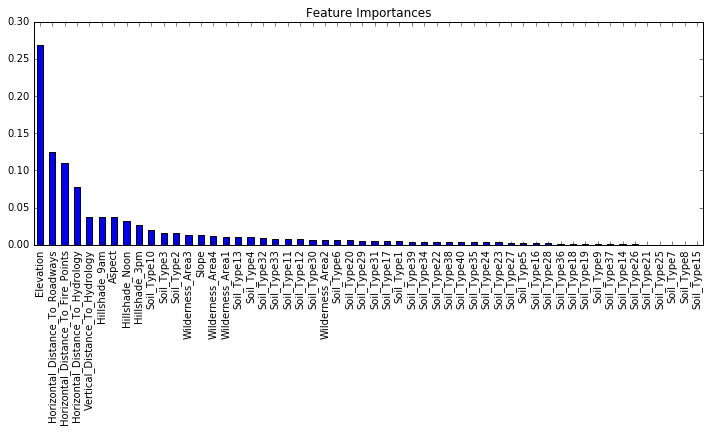

In [90]:
#Let's try GBM
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, X_fit, y_fit)
#Evaluate on development data
preds = gbm0.predict(X_eval)
print "Accuracy (Dev) : %.4g" % metrics.accuracy_score(y_eval.values, preds)
#print metrics.classification_report(y_eval.values, preds)


Model Report
Accuracy (Train): 0.9939
CV (f1) Score : Mean - 0.8144384 | Std - 0.009147397 | Min - 0.8053383 | Max - 0.8274795 

Accuracy (Dev) : 0.8265
             precision    recall  f1-score   support

          1       0.70      0.78      0.74       644
          2       0.77      0.65      0.70       684
          3       0.77      0.78      0.77       639
          4       0.92      0.96      0.94       636
          5       0.88      0.92      0.90       650
          6       0.81      0.79      0.80       646
          7       0.95      0.92      0.93       637

avg / total       0.83      0.83      0.83      4536



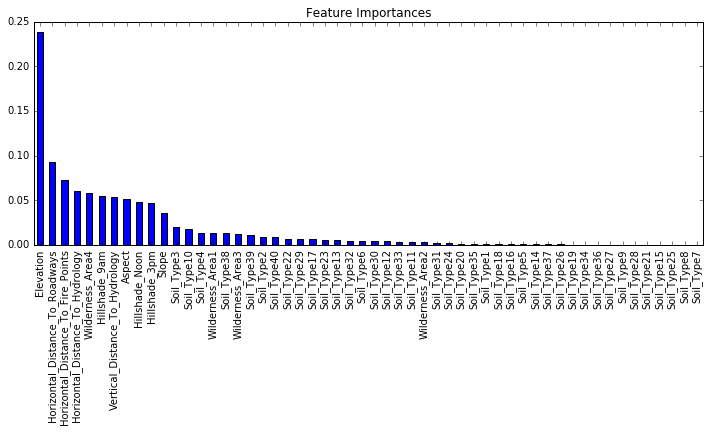

In [91]:
#let's try Random Forest model
rfc = RandomForestClassifier(random_state=10)
modelfit(rfc, X_fit, y_fit)
#Evaluate on development data
preds = rfc.predict(X_eval)
print "Accuracy (Dev) : %.4g" % metrics.accuracy_score(y_eval.values, preds)
print metrics.classification_report(y_eval.values, preds)

In [92]:
#Submission of test values -- Run this once after finalizing model
preds = rfc.predict(test[predictors])
submission = pd.DataFrame({"Id":test[IDcol], "Cover_Type":preds})
submission.to_csv("submission.csv", index=False)

In [96]:
#Next Steps
    
#Tried few models learned so far in the class.
#Next steps include feature engineering to find more relevant features
#Also, to try other types of models, particularly neural networks. Continue tuning of the above models by performing gridsearch
#Currnet accuracy benchmark is 0.83 on dev data and 0.59 on public leaderboard